In [46]:
df = pd.read_csv('regular_dataset_r3_2xlarge_us-east-1b.csv', index_col='Time', parse_dates=True)
df

,Unnamed: 0,Price
Time,,
2021-04-03,0,0.137033
2021-04-04,1,0.137575
2021-04-05,2,0.138600
2021-04-06,3,0.139000
2021-04-07,4,0.140125
...,...,...
2021-06-23,81,0.158100
2021-06-24,82,0.157633
2021-06-25,83,0.158100


In [5]:
df = df.drop("Unnamed: 0", axis=1)
df

,Price
Time,
2021-04-03,0.137033
2021-04-04,0.137575
2021-04-05,0.138600
2021-04-06,0.139000
2021-04-07,0.140125
...,...
2021-06-23,0.158100
2021-06-24,0.157633
2021-06-25,0.158100


In [6]:
df.index.freq = "D"
df.head()

,Price
Time,
2021-04-03,0.137033
2021-04-04,0.137575
2021-04-05,0.138600
2021-04-06,0.139000
2021-04-07,0.140125


<Axes: xlabel='Time'>

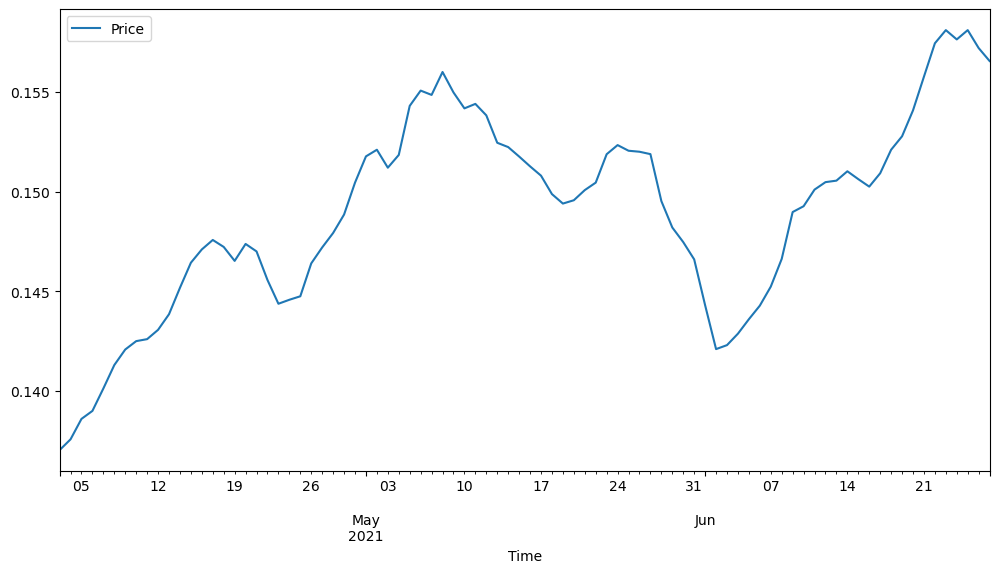

In [7]:
df.plot(figsize=(12,6))

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

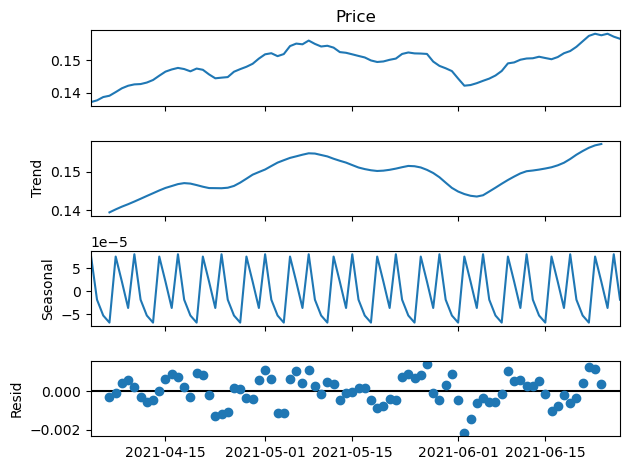

In [9]:
results = seasonal_decompose(df['Price'])
results.plot();

In [10]:
len(df)

86

# Train and Test 

In [11]:
train = df.iloc[:72]
test = df.iloc[72:]

In [12]:
train, test

(               Price
 Time                
 2021-04-03  0.137033
 2021-04-04  0.137575
 2021-04-05  0.138600
 2021-04-06  0.139000
 2021-04-07  0.140125
 ...              ...
 2021-06-09  0.148975
 2021-06-10  0.149267
 2021-06-11  0.150100
 2021-06-12  0.150475
 2021-06-13  0.150550
 
 [72 rows x 1 columns],
                Price
 Time                
 2021-06-14  0.151020
 2021-06-15  0.150625
 2021-06-16  0.150250
 2021-06-17  0.150920
 2021-06-18  0.152100
 2021-06-19  0.152775
 2021-06-20  0.154075
 2021-06-21  0.155767
 2021-06-22  0.157440
 2021-06-23  0.158100
 2021-06-24  0.157633
 2021-06-25  0.158100
 2021-06-26  0.157200
 2021-06-27  0.156550)

# Scaling the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
df.head(),df.tail()

(               Price
 Time                
 2021-04-03  0.137033
 2021-04-04  0.137575
 2021-04-05  0.138600
 2021-04-06  0.139000
 2021-04-07  0.140125,
                Price
 Time                
 2021-06-23  0.158100
 2021-06-24  0.157633
 2021-06-25  0.158100
 2021-06-26  0.157200
 2021-06-27  0.156550)

In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
scaled_train[:10]

array([[0.        ],
       [0.02855888],
       [0.08260105],
       [0.10369069],
       [0.16300527],
       [0.22495606],
       [0.26608084],
       [0.28822496],
       [0.29349736],
       [0.31810193]])

In [17]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
num_inputs = 12

In [19]:
# define generator
n_input = num_inputs
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
generator

In [20]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02855888 0.08260105 0.10369069 0.16300527 0.22495606
 0.26608084 0.28822496 0.29349736 0.31810193 0.35940246 0.42926186]
Predict this y: 
 [[0.49560633]]


In [21]:
X.shape

(1, 12, 1)

# LSTM MODEL

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [153]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [154]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [155]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1515
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 3/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0211
Epoch 4/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 8/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 10/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 11/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 12/50
60/60 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 13/50
60/60 [==============================

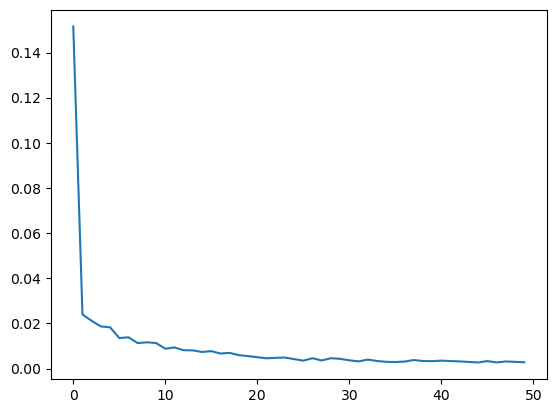

In [156]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [157]:
last_train_batch = scaled_train[-num_inputs:]

In [158]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

# Predicting

In [159]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 64ms/step


array([[0.7268798]], dtype=float32)

In [160]:
scaled_test[0]

array([0.73743409])

In [161]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 6ms/step


In [162]:
test_predictions

[array([0.7268798], dtype=float32),
 array([0.72338474], dtype=float32),
 array([0.71180135], dtype=float32),
 array([0.69358635], dtype=float32),
 array([0.6706333], dtype=float32),
 array([0.64613485], dtype=float32),
 array([0.62393886], dtype=float32),
 array([0.6073163], dtype=float32),
 array([0.5970469], dtype=float32),
 array([0.5960662], dtype=float32),
 array([0.6038722], dtype=float32),
 array([0.6205421], dtype=float32),
 array([0.64452755], dtype=float32),
 array([0.6733002], dtype=float32)]

In [163]:
test.head()

,Price,Predictions
Time,,
2021-06-14,0.151020,0.150643
2021-06-15,0.150625,0.150480
2021-06-16,0.150250,0.150092
2021-06-17,0.150920,0.149544
2021-06-18,0.152100,0.148842


In [164]:
true_predictions = scaler.inverse_transform(test_predictions)

In [165]:
true_predictions

array([[0.15081982],
       [0.15075353],
       [0.15053383],
       [0.15018835],
       [0.14975301],
       [0.14928836],
       [0.14886737],
       [0.1485521 ],
       [0.14835732],
       [0.14833872],
       [0.14848678],
       [0.14880295],
       [0.14925787],
       [0.14980359]])

In [166]:
test['Predictions'] = true_predictions

/var/folders/nk/qlz_hp8560397kpbstmqzwhh0000gn/T/ipykernel_6361/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [167]:
test

,Price,Predictions
Time,,
2021-06-14,0.151020,0.150820
2021-06-15,0.150625,0.150754
2021-06-16,0.150250,0.150534
2021-06-17,0.150920,0.150188
2021-06-18,0.152100,0.149753
2021-06-19,0.152775,0.149288
2021-06-20,0.154075,0.148867
2021-06-21,0.155767,0.148552
2021-06-22,0.157440,0.148357


In [168]:
my_predictions = test.copy()
my_predictions.drop('Price', axis='columns', inplace=True)
my_predictions

,Predictions
Time,
2021-06-14,0.150820
2021-06-15,0.150754
2021-06-16,0.150534
2021-06-17,0.150188
2021-06-18,0.149753
2021-06-19,0.149288
2021-06-20,0.148867
2021-06-21,0.148552
2021-06-22,0.148357


In [169]:
my_test = test.copy()
my_test.drop("Predictions",axis='columns' , inplace=True)
my_test

,Price
Time,
2021-06-14,0.151020
2021-06-15,0.150625
2021-06-16,0.150250
2021-06-17,0.150920
2021-06-18,0.152100
2021-06-19,0.152775
2021-06-20,0.154075
2021-06-21,0.155767
2021-06-22,0.157440


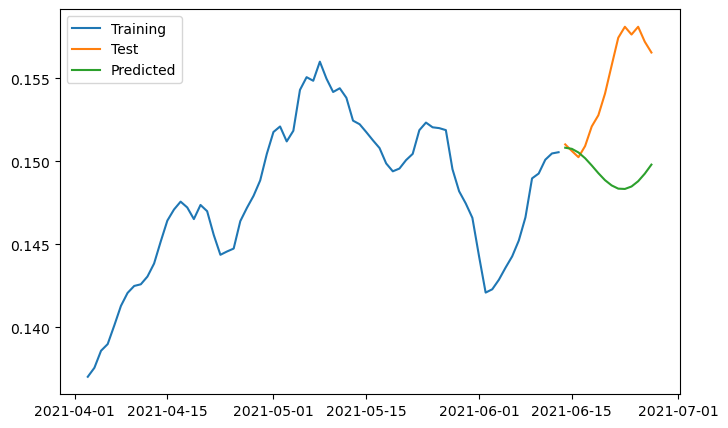

In [170]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(my_test, label='Test')
# plt.plot(df, label='Data')
plt.plot(my_predictions, label="Predicted")
plt.legend(loc="upper left")
plt.show()

<Axes: xlabel='Time'>

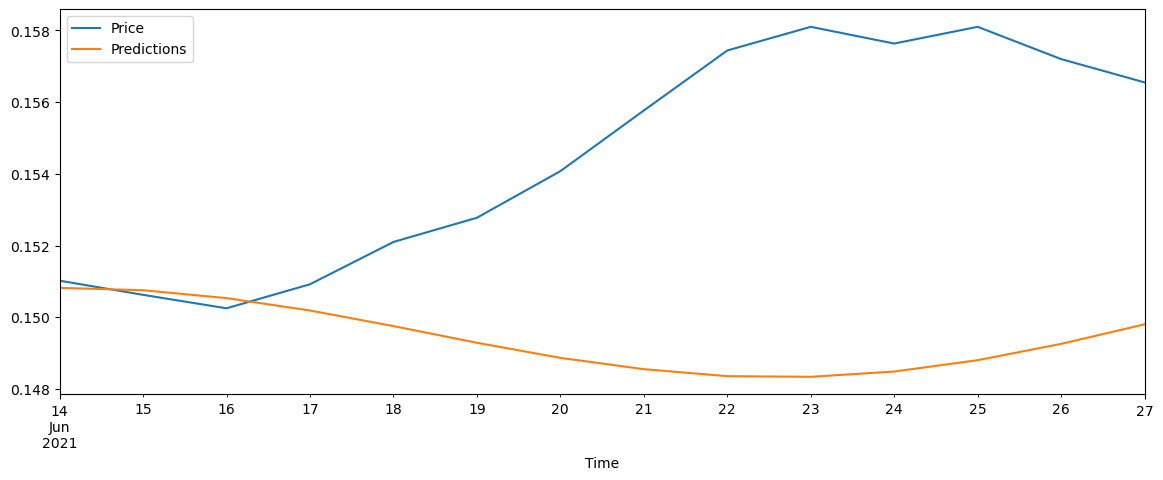

In [172]:
test.plot(figsize=(14,5))

# RMSE and R2 Values

In [173]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(test['Price'],test['Predictions']))
print(rmse)

0.006290414885740712


In [174]:
rmse

0.006290414885740712

In [175]:
r2 = r2_score(test['Price'],test['Predictions'])
r2

-3.453663237663081

In [176]:
my_predictions.to_csv("results_r3_east_1b_.csv")

In [177]:
my_predictions.describe()

,Predictions
count,14.000000
mean,0.149415
std,0.000898
min,0.148339
25%,0.148615
50%,0.149273
75%,0.150092
max,0.150820


In [178]:
test

,Price,Predictions
Time,,
2021-06-14,0.151020,0.150820
2021-06-15,0.150625,0.150754
2021-06-16,0.150250,0.150534
2021-06-17,0.150920,0.150188
2021-06-18,0.152100,0.149753
2021-06-19,0.152775,0.149288
2021-06-20,0.154075,0.148867
2021-06-21,0.155767,0.148552
2021-06-22,0.157440,0.148357


In [179]:
test.to_csv("results_full__r3_east_1b.csv")

In [180]:
des_df = test.describe().copy()
des_df

,Price,Predictions
count,14.000000,14.000000
mean,0.154468,0.149415
std,0.003093,0.000898
min,0.150250,0.148339
25%,0.151290,0.148615
50%,0.154921,0.149273
75%,0.157380,0.150092
max,0.158100,0.150820


In [181]:
des_df

,Price,Predictions
count,14.000000,14.000000
mean,0.154468,0.149415
std,0.003093,0.000898
min,0.150250,0.148339
25%,0.151290,0.148615
50%,0.154921,0.149273
75%,0.157380,0.150092
max,0.158100,0.150820


In [182]:
des_df.to_csv("Predicted Description__r3_east_1b.csv")

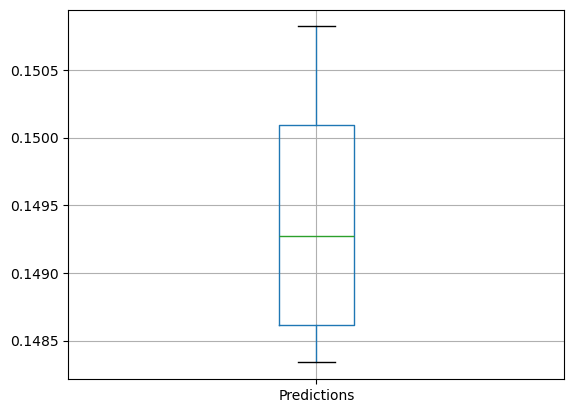

In [183]:
test.boxplot(column=["Predictions"])
plt.show()